<a href="https://colab.research.google.com/github/DomiStryj/MHE/blob/master/K_Route_Inspection_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem chińskiego listonosza/Route Inspection Problem

In [15]:
!sudo apt update
!sudo apt install libcairo2-dev ffmpeg texlive texlive-latex-extra texlive-fonts-extra texlive-latex-recommended texlive-science tipa libpango1.0-dev
!pip install manim
!pip install IPython --upgrade

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:7 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Reading package lists... Done
Building dependency tree       
Reading state information... Done
38 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependency tree       
R

# Opis problemu

Problem chińskiego listonosza polega na znalezieniu najkrótszej trasy do przejścia dla listonosza. Punktem startowym i kończowym jest poczta, miejsca, do których listonosz ma się udać z przesyłkami to wierzchołki grafu, a każda z ulic to krawędź.
Droga listonosza powinna wyglądać następująco:
1. listonosz odbiera przesyłki na poczcie
2. listonosz zanosi przesyłki do odbiorców, czyli musi dotrzeć do każdego z wierzchołków grafu, co najmniej jeden raz
3. listonosz kończy swoją trasę na poczcie.

Problem należy do problemów np, tylko wtedy, gdy graf nie zawiera cyklu Eulera.

Rozwiązaniem zadania jest znalezienie drogi, której suma wag krawędzi cyklu jest najmniejszą sumą wag krawędzi wszystkich takich cykli w grafie.

# Implementacja

# Przykład grafu, który można wykorzystać do wykonania zadania

Do wykonania zadania potrzebny będzie graf bez cyklu Eulera, czyli graf nieskierowany. Wierzchołek startowy i końcowy grafu to poczta, wierzchołki to skrzyżowania ulic, a ulice to krawędzie, które posiadają swoje wagi.



```
                   3
        (a)-----------------(b)
     1 /  |                  |  \1
      /   |                  |   \
     (c)  | 5               6|   (d)
      \   |                  |   /
     2 \  |         4        |  /1
        (e)------------------(f)
       
       a - b - d - f - d - b - f - e - c - a - c - e - a
```



In [2]:
import ast
with open("graf.txt", 'r') as f:
    punkty, odcinki, dlugosci = map(ast.literal_eval, f.readlines())

załadowany plik zawiera : 


*   pierwszy wiersz: odwiedzane punkty np . a,b,c
*   drugi wiersz: odcinki na podstawie punktów np. ac, ae
*   trzeci wiersz : wartość poszególnych odcinków 



#Funkcja celu

In [3]:
import numpy as np
import ast
import copy
import math
import random

In [4]:
def funkcjaCelu(rozwiazanie, punkt, odcinki, dlugosci):
    suma = 0
    tmp = []
    try:
        for i in range(0, len(rozwiazanie), 1): # na podstawie kolejności odwiedzanych punktów przydzieliłam pasujące do nich odcinki
            odc = punkt[rozwiazanie[i] - 1] + punkt[rozwiazanie[i + 1] - 1]
            # print(odc)
            tmp.append(odc)      # wszystkie odcinki znajdują się w tablicy tmp
    except IndexError:
        pass
    # print(tmp)
    for x in range(0, len(tmp), 1):     # dodajemy długości odcinków na podstawie tablicy tmp
        for y in range(0, len(odcinki), 1):
            if tmp[x] == odcinki[y]:
                suma += dlugosci[y]
    return suma
  
print("Trasa jaką przybył nasz listanosz wynosi :",funkcjaCelu([1, 3, 5, 6, 4, 2, 1],punkty,odcinki,dlugosci))

Trasa jaką przybył nasz listanosz wynosi : 12


Powyższy kod to funkcja celu ,  która przyjmuje tablice z listą odwiedzanych punktów oraz dane  z załadowanego pliku czyli punkty ,  odcinki, oraz ich długości. W efekcie końcowym funkcja celu zwraca łączną wartość jaką przebył nasz listanosz na wyznaczonej trasie. 

# Losowy sąsiad

W kolejnym etapie ważnym jest, aby wylosować najlepszego sąsiada, czyli wierzchołek (dom), który ma odwiedzić listonosz. Najlepszy sąsiad jest równy wierzchołkowi, do którego dotarcia listonosz pokonuje najkrótszą drogę. 


In [5]:
def losowySasiad(roz, punkty, odcinki):
    dl_max_roz = len(roz)   # maks. dł. rozwiązania
    ptk = int(random.randint(0, len(roz) - 1)) #losuje ptk z zakresu rozwiązania
    del roz[ptk + 1:]   # kasuję tablice od wybranego ptk
    for k in range(len(roz), dl_max_roz, 1):
        punkt = punkty[roz[-1] - 1] #sprawdzam ptk z konca skasowanej tablicy
        kolejne_wierzch = []
        for i in range(0, len(odcinki), 1):  # wyznaczam dostępne wierzchołki na podst. ptk z końca tablicy
            if odcinki[i][:1] == punkt:
                kolejne_wierzch.append(odcinki[i][1:])
        p = int(random.uniform(0, len(kolejne_wierzch))) #losujemy nowy wierzchołek dostępny z listy
        for j in range(0, len(punkty), 1):          #dopisuje nowy wierzchołek
            if punkty[j] == kolejne_wierzch[p]:
                roz.append(j + 1)
    return roz



# Generowanie losowej kolejności 

W celu zastosowania algorytmu , kolejnym krokiem jest wygenerowania losowej kolejności odwiedzania wierzchołów przez listonosza. Wraz ze znalezieniem losowego sąsiada, element generowania losowej kolejności jest potrzebny do wykonania algorytmu wspinaczkowego.

In [6]:
def generowanieLosowejKolejnoci(wielkosc_rozw, punkty, odcinki):
    losowa_kolejnosc = [1]    #tablica zaczyna się domyślnie od punktu startu a=1 - poczta
    for k in range(0, wielkosc_rozw - 1, 1):
        punkt = punkty[losowa_kolejnosc[-1] - 1] #zmienna posiada informacje punktu w którym się znajdujemy
        kolejne_wierzch = []
        for i in range(0, len(odcinki), 1):   #petla wyznacza kolejne wierzchołki
            if odcinki[i][:1] == punkt:
                kolejne_wierzch.append(odcinki[i][1:])
        p = int(random.uniform(0, len(kolejne_wierzch))) #losujemy liczbę o wielkości tablicy w której znajdują się dostępne wierzchołki
        for j in range(0, len(punkty), 1):
            if punkty[j] == kolejne_wierzch[p]:  # dodajemy wylosowany wierzchołek do kolejki
                losowa_kolejnosc.append(j + 1)
    return losowa_kolejnosc

# Algorytm wspinaczkowy

In [7]:
import time
import psutil

In [8]:
historia_wspinaczkowy_sekwencje=[[1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1]]
historia_wspinaczkowy_czas =[0]
historia_wspinaczkowy_długość = [60]
historia_wspinaczkowy_procesor =[0]
historia_wspinaczkowy_czas_procesor =[0]


def wspinaczkowy(cel):
    max_dl_roz = len(odcinki)  # maksymalny rozmiar rozwiązania
    min_dl_roz = int((len(odcinki) / 2) - 1)  # najmniejszy rozmiar rozwiązania
    iteracje = 2000  # ilość literacji
    tablica = []  # lista punktów odwiedzanych w proponowanym rozwiązaniu

    najlepszy_wynik = [1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1] #początkowa permutacja
    while max_dl_roz >= min_dl_roz:
        for j in range(0, iteracje, 1):
            roz = generowanieLosowejKolejnoci(max_dl_roz, punkty, odcinki)    
            nowe_roz = losowySasiad(roz, punkty, odcinki)

            for k in range(1, len(punkty) + 1):
                odw_ptk = k in nowe_roz
                if odw_ptk:
                    tablica.append(k)
            if (len(tablica) >= len(punkty)) and \
                    (nowe_roz[0] == nowe_roz[len(nowe_roz) - 1]) and \
                    cel(nowe_roz) <= cel(najlepszy_wynik):    #jeżeli spełni warunki zapisuje jako najlepsze rozwiązanie     
                najlepszy_wynik = nowe_roz         
                historia_wspinaczkowy_procesor.append(psutil.cpu_percent())# zapisujemy dane dla celów wizulizacji oraz porównania
                historia_wspinaczkowy_czas_procesor.append(time.time() - czas_start_aw)   
                znacznik = False
                for i in historia_wspinaczkowy_sekwencje:
                  if i == najlepszy_wynik:
                    znacznik = True
                if znacznik == False:
                  historia_wspinaczkowy_sekwencje.append(najlepszy_wynik)# zapisujemy dane dla celów wizulizacji oraz porównania
                  historia_wspinaczkowy_czas.append(time.time() - czas_start_aw)
                  historia_wspinaczkowy_długość.append(cel(najlepszy_wynik))
            tablica = []
        max_dl_roz -= 1
    
    return najlepszy_wynik
czas_start_aw=time.time()
roz = wspinaczkowy(lambda s: funkcjaCelu(s, punkty, odcinki, dlugosci))
czas_koniec_aw=time.time()-czas_start_aw
print("kolejność odwiedzonych punktów :" , roz)
print("długość najlepszego rozwiązania :",funkcjaCelu(roz,punkty,odcinki,dlugosci))

kolejność odwiedzonych punktów : [1, 2, 4, 6, 5, 3, 1]
długość najlepszego rozwiązania : 12


# Symulowane wyżarzanie

In [9]:

historia_wyzarzanie_sekwencje=[[1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1]]
historia_wyzarzanie_czas =[0]
historia_wyzarzanie_długość = [60]
historia_wyzarzanie_procesor = [0]
historia_wyzarzanie_czas_procesor=[0]
def symulowaneWyzarzanie(cel, Temperatura):
    max_dl_roz = len(odcinki)  # maksymalny rozmiar rozwiązania
    min_dl_roz = int((len(odcinki) / 2) - 1)  # najmniejszy rozmiar rozwiązania
    iteracje = 2000  # ilość literacji
    tablica = []  # lista punktów odwiedzanych w proponowanym rozwiązaniu
    najlepszy_wynik =  [1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1]
    while max_dl_roz >= min_dl_roz:
        V = [najlepszy_wynik]
        for j in range(1, iteracje + 1, 1):
            roz = generowanieLosowejKolejnoci(max_dl_roz, punkty, odcinki)
            nowe_roz =losowySasiad(roz, punkty, odcinki)
            for k in range(1, len(punkty) + 1):
                odw_ptk = k in nowe_roz
                if odw_ptk:
                    tablica.append(k)
            if (len(tablica) == len(punkty)) and \
                    (nowe_roz[0] == nowe_roz[len(nowe_roz) - 1]) and \
                    cel(nowe_roz) <= cel(najlepszy_wynik):
                najlepszy_wynik = nowe_roz
                historia_wyzarzanie_procesor.append(psutil.cpu_percent())# zapisujemy dane dla celów wizulizacji oraz porównania
                historia_wyzarzanie_czas_procesor.append(time.time() - czas_start_sw) 
                znacznik = False
                for i in historia_wyzarzanie_sekwencje:
                  if i == najlepszy_wynik:
                    znacznik = True
                if znacznik == False:
                  V.append(najlepszy_wynik)
                  historia_wyzarzanie_sekwencje.append(najlepszy_wynik) # zapisujemy dane dla celów wizulizacji oraz porównania
                  historia_wyzarzanie_czas.append(time.time() - czas_start_sw)
                  historia_wyzarzanie_długość.append(cel(najlepszy_wynik))


            else:
                e = math.exp(- abs(cel(najlepszy_wynik) - cel(nowe_roz)) / Temperatura(j))
                u = random.uniform(0.0, 1.0)
                if (u < e) and \
                        (len(tablica) == len(punkty)) and \
                        (nowe_roz[0] == nowe_roz[len(nowe_roz) - 1]):
                    najlepszy_wynik = nowe_roz
                    historia_wyzarzanie_procesor.append(psutil.cpu_percent())# zapisujemy dane dla celów wizulizacji oraz porównania
                    historia_wyzarzanie_czas_procesor.append(time.time() - czas_start_sw) 
                    znacznik = False
                    for i in historia_wyzarzanie_sekwencje:
                      if i == najlepszy_wynik:
                        znacznik = True
                    if znacznik == False:
                      V.append(najlepszy_wynik)
                      historia_wyzarzanie_sekwencje.append(najlepszy_wynik)# zapisujemy dane dla celów wizulizacji oraz porównania
                      historia_wyzarzanie_czas.append(time.time() - czas_start_sw)
                      historia_wyzarzanie_długość.append(cel(najlepszy_wynik))
                    
            tablica = []
        max_dl_roz -= 1
    return min(V, key=cel)
czas_start_sw=time.time()

roz = symulowaneWyzarzanie(lambda s: funkcjaCelu(s, punkty, odcinki, dlugosci),lambda k: 1000 / k)
czas_koniec_sw=time.time()-czas_start_sw
print("kolejność odwiedzonych punktów", roz)
print("długość najlepszego rozwiązania :", funkcjaCelu(roz,punkty,odcinki,dlugosci))

kolejność odwiedzonych punktów [1, 2, 4, 6, 5, 3, 1]
długość najlepszego rozwiązania : 12


# Porównanie metod oraz wykres

Poprzez wykonanie około 20 prób można stwierdzić, że algorytm wspinaczkowy jest  szybszy, ale ilość możliwych wyników jest mniejsza 

Algorytm wspinaczkowy- wyniki testowe:

In [10]:
print(roz)
print("Czas działania: ", czas_koniec_aw)
print("Ilość rozwiązań spełniających warunek rozwiąznia :", len(historia_wspinaczkowy_długość))

[1, 2, 4, 6, 5, 3, 1]
Czas działania:  1.371063470840454
Ilość rozwiązań spełniających warunek rozwiąznia : 38


Algorytm symulowanego wyżarzania- wyniki testowe:

In [11]:
print(roz)
print("Czas działania: ", czas_koniec_sw)
print("Ilość rozwiązań spełniających warunek rozwiąznia :",len(historia_wyzarzanie_długość))

[1, 2, 4, 6, 5, 3, 1]
Czas działania:  2.2364885807037354
Ilość rozwiązań spełniających warunek rozwiąznia : 134


In [12]:
!pip install --upgrade plotly
!pip install jupyter-dash


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 59.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 20.5 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.0
    Uninstalling Werkzeug-2.3.0:
      Successfully uninstalled Werkzeug-2.3.0


[0, 0.000446319580078125, 0.0016069412231445312, 0.0021893978118896484, 0.005409955978393555, 0.010257244110107422, 0.021355867385864258, 0.02508711814880371, 0.04006052017211914, 0.04275393486022949, 0.08693861961364746, 0.0966954231262207, 0.1374807357788086, 0.18802809715270996, 0.22428655624389648, 0.24927663803100586, 0.3440871238708496, 0.4150533676147461, 0.4291989803314209, 0.43172144889831543, 0.43520641326904297, 0.44229841232299805, 0.4534263610839844, 0.4977853298187256, 0.5802779197692871, 0.8512969017028809, 0.9184401035308838, 0.9755971431732178, 1.0229318141937256, 1.1446092128753662, 1.1451497077941895, 1.1600582599639893, 1.1635053157806396, 1.1666817665100098, 1.186539649963379, 1.1962931156158447, 1.293821096420288, 1.3218903541564941]
[60, 40, 34, 34, 34, 34, 34, 34, 34, 28, 26, 26, 26, 24, 24, 24, 24, 24, 24, 24, 24, 22, 22, 18, 18, 16, 16, 16, 16, 16, 14, 14, 14, 14, 14, 14, 12, 12]


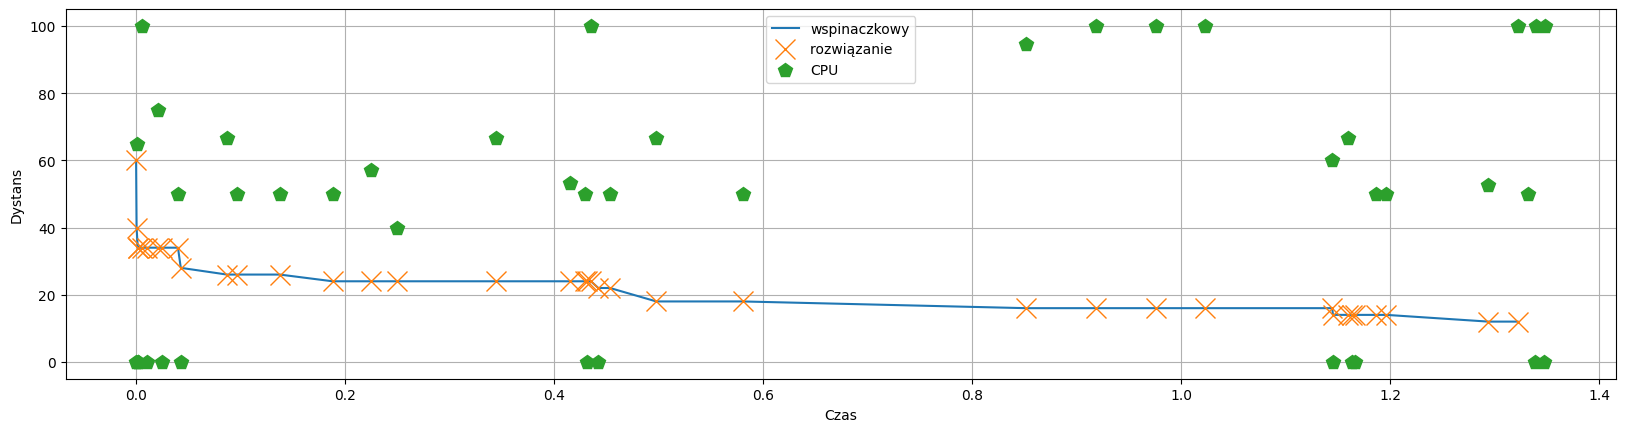

[0, 0.001247406005859375, 0.003465890884399414, 0.004849910736083984, 0.005616664886474609, 0.006415367126464844, 0.010380744934082031, 0.010838985443115234, 0.011373519897460938, 0.012993574142456055, 0.014844417572021484, 0.015889644622802734, 0.016649484634399414, 0.01951432228088379, 0.02387380599975586, 0.02881026268005371, 0.03173470497131348, 0.032816410064697266, 0.04069948196411133, 0.047028303146362305, 0.05361819267272949, 0.057054758071899414, 0.08795833587646484, 0.11860179901123047, 0.16332459449768066, 0.17389535903930664, 0.20665550231933594, 0.22808384895324707, 0.2745237350463867, 0.2805595397949219, 0.2861630916595459, 0.29846739768981934, 0.33780694007873535, 0.34917211532592773, 0.44739294052124023, 0.511451005935669, 0.5131454467773438, 0.5140235424041748, 0.5144174098968506, 0.5175042152404785, 0.5183353424072266, 0.5197584629058838, 0.5230884552001953, 0.5268263816833496, 0.5312871932983398, 0.5315589904785156, 0.5358376502990723, 0.5417079925537109, 0.542455911

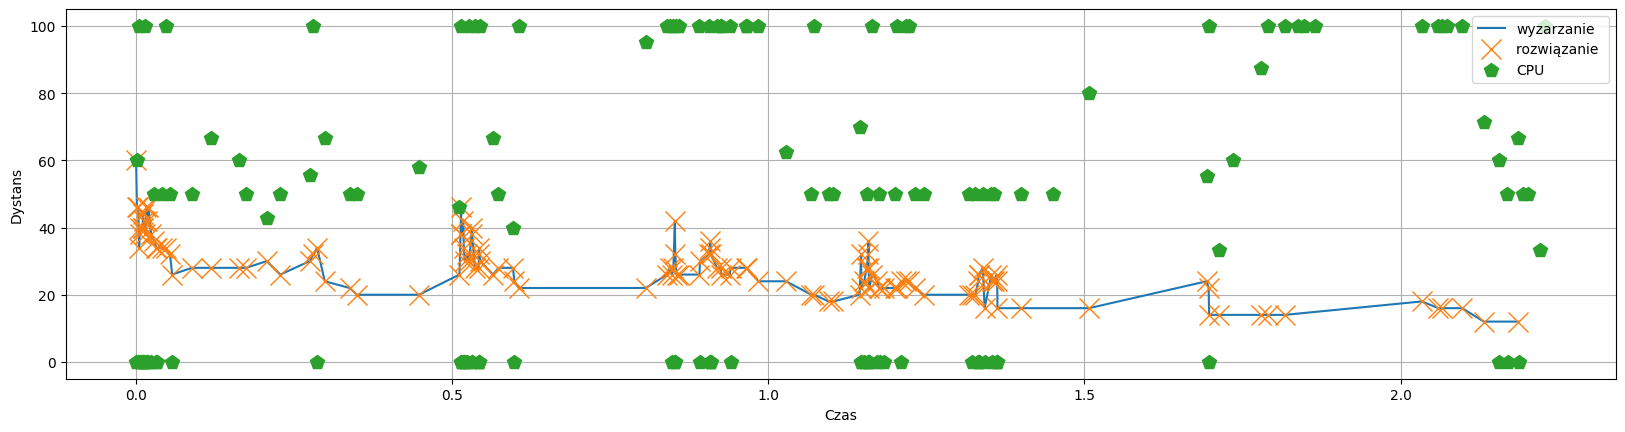

In [13]:
import matplotlib.pyplot as plt


print(historia_wspinaczkowy_czas)
print(historia_wspinaczkowy_długość)

plt.figure().set_figwidth(20)

plt.plot (historia_wspinaczkowy_czas, historia_wspinaczkowy_długość, label = "wspinaczkowy")
plt.plot(historia_wspinaczkowy_czas,historia_wspinaczkowy_długość,'x', label="rozwiązanie ",ms = 15)
plt.plot(historia_wspinaczkowy_czas_procesor,historia_wspinaczkowy_procesor,'p', label="CPU",ms = 10)
plt.xlabel('Czas')
plt.ylabel('Dystans')
plt.legend()
plt.grid()
plt.show()

print( historia_wyzarzanie_czas)
print(historia_wyzarzanie_długość)
plt.figure().set_figwidth(20)
plt.plot (historia_wyzarzanie_czas, historia_wyzarzanie_długość, label = "wyzarzanie")
plt.plot(historia_wyzarzanie_czas,historia_wyzarzanie_długość,'x', label="rozwiązanie ",ms = 15)
plt.plot(historia_wyzarzanie_czas_procesor,historia_wyzarzanie_procesor,'p', label="CPU",ms = 10)
plt.xlabel('Czas')
plt.ylabel('Dystans')
plt.legend()
plt.grid()
plt.show()




# Wizualizacja

---



In [14]:
from manim import *
import numpy as np
import random

ContextualVersionConflict: ignored

In [ ]:
%%manim MojaScena


class MojaScena(Scene):
  def construct(self):
    print(historia_wspinaczkowy_długość)
    for i in range(1,len(historia_wspinaczkowy_długość) +1 , 1):
      circle = Circle(radius =historia_wspinaczkowy_długość[i-1]*0.12).set_stroke(color=random_color(), width=10)

      self.add(circle)
      self.wait(1)
  


In [ ]:
%%manim MojaScena

class MojaScena(Scene):
  def construct(self):
    print(historia_wyzarzanie_długość)
    for i in range(1,len(historia_wyzarzanie_długość) +1 , 1):
      circle = Circle(radius =historia_wyzarzanie_długość[i-1]*0.12).set_stroke(color=random_color(), width=10)

      self.add(circle)
      self.wait(0.5)


Tworzenie grafu polega na stworzeniu słownika "graph", który rysuje graf na podstawie podanych krawędzi, następnie wypisuje listę sąsiadów dla każdego wierzchołka.

In [ ]:
%%manim MojaScena



  

class MojaScena(Scene):
  def construct(self):
    
    print(historia_wspinaczkowy_sekwencje)
    print(historia_wspinaczkowy_sekwencje[1])
    circle1 =Circle(radius =0.5).set_stroke(color=WHITE, width=10)
    circle2 =Circle(radius =0.5).set_stroke(color=WHITE, width=10)
    circle3 =Circle(radius =0.5).set_stroke(color=WHITE, width=10)
    circle4 =Circle(radius =0.5).set_stroke(color=WHITE, width=10)
    circle5 =Circle(radius =0.5).set_stroke(color=WHITE, width=10)
    circle6 =Circle(radius =0.5).set_stroke(color=WHITE, width=10)
    circle4.shift([5,0,0])
    circle3.shift([-5,0,0])
    circle1.shift([-3,2,0])
    circle2.shift([3,2,0])
    circle5.shift([-3,-2,0])
    circle6.shift([3,-2,0])
    self.add(circle4)
    self.add(circle3)
    self.add(circle1)
    self.add(circle2)
    self.add(circle5)
    self.add(circle6)
    for j in range(1,len(historia_wspinaczkowy_sekwencje),1):
      for i in range(0,len(historia_wspinaczkowy_sekwencje[j]) ,1):
        if historia_wspinaczkowy_sekwencje[j][i] == 1 :
          circle1 = Circle(radius = 0.5, color = RED, fill_opacity = 1).shift([-3,2,0])
          self.add(circle1)
          self.wait(0.2)
          self.remove(circle1)
          self.wait(0.2)
        if historia_wspinaczkowy_sekwencje[j][i] == 2 :
          circle2 = Circle(radius = 0.5, color = RED, fill_opacity = 1).shift([3,2,0])
          self.add(circle2)
          self.wait(0.2)
          self.remove(circle2)
          self.wait(0.2)
        if historia_wspinaczkowy_sekwencje[j][i] == 3 :
          circle3 = Circle(radius = 0.5, color = RED, fill_opacity = 1).shift([-5,0,0])
          self.add(circle3)
          self.wait(0.2)
          self.remove(circle3)
          self.wait(0.2)
        if historia_wspinaczkowy_sekwencje[j][i] == 4 :
          circle4 = Circle(radius = 0.5, color = RED, fill_opacity = 1).shift([5,0,0])
          self.add(circle4)
          self.wait(0.2)
          self.remove(circle4)
          self.wait(0.2)
        if historia_wspinaczkowy_sekwencje[j][i] == 5 :
          circle5 = Circle(radius = 0.5, color = RED, fill_opacity = 1).shift([-3,-2,0])
          self.add(circle5)
          self.wait(0.2)
          self.remove(circle5)
          self.wait(0.2)
        if historia_wspinaczkowy_sekwencje[j][i] == 6 :
          circle6 = Circle(radius = 0.5, color = RED, fill_opacity = 1).shift([3,-2,0])
          self.add(circle6)
          self.wait(0.2)
          self.remove(circle6)
          self.wait(0.2)
      self.wait(1)
      